### Vamshi Krishna Meriga:

# ISM 5136 - Data Analytics and Mining for Business

## Lab Session: Classification with Decision Trees

### Overview:
This lab covers operations related to decision tree classification.

### Task:
The code cells in this notebook have been left blank. Your task is to complete these cells and provide the execution results. The corresponding question text for each code cell is provided above the cell. Once you have completed the lab, you should publish your notebook code (the code in the .ipynb file) as a "<u>Secret Gist</u>" on your GitHub repository and obtain the Gist ID.

### Submission Format:
There are two deliverables of this lab: 1) the Gist ID and 2) the completed .ipynb file. Both of these should be submitted on Canvas using the corresponding lab submission link by the due date indicated on Canvas.

### Important: Do <u>not</u> forget to run the cells before submitting your work.


### Data Description:
![Image of Pikachu](https://i.imgur.com/xx8TtMh.png?1)
<b>This is a Pokemon dataset. Gotta Catch 'Em All!</b> <br>
The training data ("pokemon_train.csv") includes a number of pokemon and their stats and characteristics. The target attribute that we are trying to predict is "hasMegaEvolution" - i.e., whether a Pokemon is capable of mega evolving or not. <br>
The prediction data ("pokemon_predict.csv") is in similar format, but has missing values for the "hasMegaEvolution" attribute.


### Please note that there are multiple steps under each question. You should complete and run each step individually (before moving on to the next one) to make sure that your code is correct.

### Question 1: Building a Model with Only Numerical Attributes

#### 1.1. Data import and cleaning
* Import the 'pokemon_train.csv' data as a Pandas dataframe.
* Check if there are any missing values in the data. Notice that there are missing values in one of the attributes. Count how many observations have missing values for this attribute.
* Since the number of missing values is high, it might not be a good idea to remove the observations with missing values (this would result in significant data loss). Instead, remove the attribute with missing values attribute from the dataframe. 
* In addition, remove the "Name" attribute since this is a unique identifier that has no prediction value.

In [1]:
import pandas as pd
file = pd.read_csv("C:/Users/VenkatBhaskar/Downloads/pokemon_train.csv")
file

,Name,Type_1,Type_2,HP,Attack,Defense,Speed,isLegendary,Color,Egg_Group_1,hasMegaEvolution
0,Bulbasaur,Grass,Poison,45,49,49,45,No,Green,Monster,No
1,Ivysaur,Grass,Poison,60,62,63,60,No,Green,Monster,No
2,Venusaur,Grass,Poison,80,82,83,80,No,Green,Monster,Yes
3,Charmander,Fire,NaN,39,52,43,65,No,Red,Monster,No
4,Charmeleon,Fire,NaN,58,64,58,80,No,Red,Monster,No
...,...,...,...,...,...,...,...,...,...,...,...
706,Noibat,Flying,Dragon,40,30,35,55,No,Purple,Flying,No
707,Noivern,Flying,Dragon,85,70,80,123,No,Purple,Flying,No
708,Xerneas,Fairy,NaN,126,131,95,99,Yes,Blue,Undiscovered,No
709,Hoopa,Psychic,Ghost,80,110,60,70,Yes,Purple,Undiscovered,No


In [2]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              711 non-null    object
 1   Type_1            711 non-null    object
 2   Type_2            341 non-null    object
 3   HP                711 non-null    int64 
 4   Attack            711 non-null    int64 
 5   Defense           711 non-null    int64 
 6   Speed             711 non-null    int64 
 7   isLegendary       711 non-null    object
 8   Color             711 non-null    object
 9   Egg_Group_1       711 non-null    object
 10  hasMegaEvolution  711 non-null    object
dtypes: int64(4), object(7)
memory usage: 61.2+ KB


In [6]:
file.isnull().sum()

Name                  0
Type_1                0
Type_2              370
HP                    0
Attack                0
Defense               0
Speed                 0
isLegendary           0
Color                 0
Egg_Group_1           0
hasMegaEvolution      0
dtype: int64

In [7]:
file.Type_2

0      Poison
1      Poison
2      Poison
3         NaN
4         NaN
        ...  
706    Dragon
707    Dragon
708       NaN
709     Ghost
710     Water
Name: Type_2, Length: 711, dtype: object

In [10]:
nfile = file.drop(columns=['Type_2','Name'])
nfile

,Type_1,HP,Attack,Defense,Speed,isLegendary,Color,Egg_Group_1,hasMegaEvolution
0,Grass,45,49,49,45,No,Green,Monster,No
1,Grass,60,62,63,60,No,Green,Monster,No
2,Grass,80,82,83,80,No,Green,Monster,Yes
3,Fire,39,52,43,65,No,Red,Monster,No
4,Fire,58,64,58,80,No,Red,Monster,No
...,...,...,...,...,...,...,...,...,...
706,Flying,40,30,35,55,No,Purple,Flying,No
707,Flying,85,70,80,123,No,Purple,Flying,No
708,Fairy,126,131,95,99,Yes,Blue,Undiscovered,No
709,Psychic,80,110,60,70,Yes,Purple,Undiscovered,No


#### 1.2. Data preparation
* To build a classification model using the scikit learn package, we will need to split the data into two parts (input and target) as follows:
    * The 1st dataframe should only include the numerical attributes (4 of them) that we will use for prediction (i.e., inputs). Call this dataframe X. When selecting the numerical attributes, try to avoid hard-coding (You can use the "select.dtypes" method to subset the data with attributes of a particular type).
    * The 2nd part should only include the target attribute (i.e., hasMegaEvolution). Note that since there is only a single attribute, Pandas will automatically use the "Series" data type for this part. Call this series y.
* Check the unique values in the target attribute data set (y). Notice that the values (i.e., class labels) are "Yes" and "No", and are encoded as string type. 
* Most classification algorithms accept only integer type values. Therefore, re-code "Yes" values to 1 and "No" values to 0 in the same data set (y).
* Print out the unique y values after the re-coding.

##### Hints:
1. <span style="color: black; background: black; span:hover { color: white}">Re-coding is replacing an original value with a pre-specified different value. "replace" or "map" methods can help to achieve this task.</span>

In [11]:
X = nfile.select_dtypes(include='int')
X

,HP,Attack,Defense,Speed
0,45,49,49,45
1,60,62,63,60
2,80,82,83,80
3,39,52,43,65
4,58,64,58,80
...,...,...,...,...
706,40,30,35,55
707,85,70,80,123
708,126,131,95,99
709,80,110,60,70


In [13]:
y = nfile['hasMegaEvolution']
y

0       No
1       No
2      Yes
3       No
4       No
      ... 
706     No
707     No
708     No
709     No
710     No
Name: hasMegaEvolution, Length: 711, dtype: object

In [14]:
y = y.replace('Yes',1)
y = y.replace('No',0)
y

0      0
1      0
2      1
3      0
4      0
      ..
706    0
707    0
708    0
709    0
710    0
Name: hasMegaEvolution, Length: 711, dtype: int64

#### 1.3. Building the model
* For many data mining operations in Python, we will use the scikit-learn library. Import the tree module from scikit-learn using the following statement: "from sklearn import tree".
* The tree module includes a decision tree algorithm in the DecisionTreeClassifier class. Instantiate an object from this class using the statement: "model1 = tree.DecisionTreeClassifier(criterion='entropy')
* Now, you can call the "fit" method from this object to build a decision tree model. To do this, you need to pass two parameters, the input attribute set (X) and the target attribute set (y). 
* See the following documentation for customizing the decision tree: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* Build a model using information gain, i.e. entropy as the purity function used to measure the quality of splits.

In [18]:
from sklearn import tree
model1 = tree.DecisionTreeClassifier(criterion='entropy')
model1=model1.fit(X,y)
y_pred=model1.predict(X[:10])
print(y_pred)

[0 0 1 0 0 0 0 0 1 0]


In [29]:
nfile.iloc[:10,8]

0     No
1     No
2    Yes
3     No
4     No
5    Yes
6     No
7     No
8    Yes
9     No
Name: hasMegaEvolution, dtype: object

#### 1.4. Observing the model
* Now, you will look at two ways of summarizing the workings of the tree model.
* "feature\_importances_" is a useful attribute to obtain normalized feature weights. These weights indicate how useful a feature is when an observation needs to be classified using this model. Create a dictionary of feature names and feature importance scores.
* Scikit-learn does not have a visualization tool for decision trees, however you can use the graphviz package for this purpose. Use the following code and obtain a visual representation of the tree as a pdf file:<br>
import graphviz <br>
dot_data = tree.export_graphviz(model1, out_file=None) <br> 
graph = graphviz.Source(dot_data) <br>
graph.render('pokemon') 
* Find the "pokemon.pdf" file in the local machine and observe the tree. Note that the current tree seems too complicated with many branches and levels. Try changing the model1 parameters (as you instantiate it as an object) to see if you can make the tree more compact and generalizable. See the documentation (the link given above) to understand more about possible parameters you can use for this purpose.
* <b>Note</b>: If you have trouble running the graphviz package, you can skip the visualization step.

##### Hints:
1. <span style="color: black; background: black; span:hover { color: white}">For creating the feature importance dictionary, you can loop through X column names by using enumerate(X.columns)</span>

In [ ]:
# Enter your answer to the question above in this cell.

In [30]:
#Feature Importance
imp=model1.feature_importances_

In [41]:
features=X.columns.tolist()
d_features={}
for index,feature in enumerate(features):
    d_features[feature]=imp[index]
print(d_features)

{'HP': 0.21489831930412664, 'Attack': 0.18691768537320377, 'Defense': 0.21920635174573694, 'Speed': 0.37897764357693264}


In [44]:
import graphviz
dot_data = tree.export_graphviz(model1, out_file=None)
graph = graphviz.Source(dot_data)
graph.render('pokemon')

ModuleNotFoundError: No module named 'graphviz'

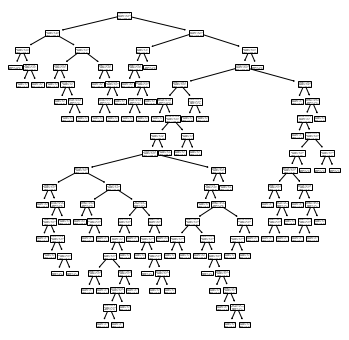

In [47]:
from sklearn import tree
from matplotlib import pyplot as plt
fig,ax=plt.subplots(figsize=(6,6))
tree.plot_tree(model1,ax=ax,feature_names=features)
plt.savefig('tree.pdf')

### Question 2: Building a Model Using a Mixed Attribute Set

#### 2.1. Data import and cleaning
* Now, you will use a combination of categorical and continuous attributes to build a classification model.
* <b>Important:</b> When working with a categorical (e.g., in string format) attribute that you'd like to use as an input for classification (in scikit-learn), you will need to convert this attribute into a numerical form using "one-hot encoding". This encoding process creates a separate attribute for each possible value and codes it using binary (1/0) integer format.
* For this question, it is a good idea to "clean" the memory - i.e., reset the variable space.
* Start from scratch by re-importing the 'pokemon_train.csv' into a dataframe and performing the data cleaning operations -- i.e., re-running the code in Step 1.1. 

In [103]:
# Enter your answer to the question above in this cell.
df = pd.read_csv("C:/Users/VenkatBhaskar/Downloads/pokemon_train.csv")
df=df.drop(columns=['Type_2','Name'])
df

,Type_1,HP,Attack,Defense,Speed,isLegendary,Color,Egg_Group_1,hasMegaEvolution
0,Grass,45,49,49,45,No,Green,Monster,No
1,Grass,60,62,63,60,No,Green,Monster,No
2,Grass,80,82,83,80,No,Green,Monster,Yes
3,Fire,39,52,43,65,No,Red,Monster,No
4,Fire,58,64,58,80,No,Red,Monster,No
...,...,...,...,...,...,...,...,...,...
706,Flying,40,30,35,55,No,Purple,Flying,No
707,Flying,85,70,80,123,No,Purple,Flying,No
708,Fairy,126,131,95,99,Yes,Blue,Undiscovered,No
709,Psychic,80,110,60,70,Yes,Purple,Undiscovered,No


#### 2.2. Data Preparation
* Split the data into two data sets -- one containing all the input attributes (numerical and categorical) and the other containing only the target attribute. Call the first data set X and the second one y.

##### Hints:
1. <span style="color: black; background: black; span:hover { color: white}">An easy way to copy all the attributes except the target one into a new dataframe is to make a copy of the existing data and then drop the target attribute from this copy.</span>

In [104]:
# Enter your answer to the question above in this cell.
y=df['hasMegaEvolution']
y

0       No
1       No
2      Yes
3       No
4       No
      ... 
706     No
707     No
708     No
709     No
710     No
Name: hasMegaEvolution, Length: 711, dtype: object

In [105]:
df.drop(columns=['hasMegaEvolution'],inplace=True)

In [106]:
c1=df.select_dtypes(include=['object']).columns.tolist()
c2=df.select_dtypes(exclude=['object']).columns.tolist()
c3=c1+c2
print(c3)

['Type_1', 'isLegendary', 'Color', 'Egg_Group_1', 'HP', 'Attack', 'Defense', 'Speed']


In [136]:
df1=df[c3]
X=df1
X

,Type_1,isLegendary,Color,Egg_Group_1,HP,Attack,Defense,Speed
0,Grass,No,Green,Monster,45,49,49,45
1,Grass,No,Green,Monster,60,62,63,60
2,Grass,No,Green,Monster,80,82,83,80
3,Fire,No,Red,Monster,39,52,43,65
4,Fire,No,Red,Monster,58,64,58,80
...,...,...,...,...,...,...,...,...
706,Flying,No,Purple,Flying,40,30,35,55
707,Flying,No,Purple,Flying,85,70,80,123
708,Fairy,Yes,Blue,Undiscovered,126,131,95,99
709,Psychic,Yes,Purple,Undiscovered,80,110,60,70


#### 2.3. Data manipulation
* Re-code y using 1 for "Yes" and 0 for "No". Notice that this is different than one hot encoding because you are replacing the values in the same column.
* Encode all the categorical attributes in X using one hot encoding. Notice that this process should create a number of new attributes that are in binary form (1/0). How many new attributes have been generated?
* After these operations, print out the shape of the new datasets and print out the first 10 records from each.

##### Hints:
1. <span style="color: black; background: black; span:hover { color: white}">For one-hot encoding, you can use the "get_dummies" method in Pandas or OneHotEncoder in scikit-learn.</span>
1. <span style="color: black; background: black; span:hover { color: white}">Make sure that the original categorical attributes have been removed from the data after one hot encoding.</span>


In [108]:
# Enter your answer to the question above in this cell.
y=y.replace('Yes',1)
y=y.replace('No',0)
y

0      0
1      0
2      1
3      0
4      0
      ..
706    0
707    0
708    0
709    0
710    0
Name: hasMegaEvolution, Length: 711, dtype: int64

In [137]:
X

,Type_1,isLegendary,Color,Egg_Group_1,HP,Attack,Defense,Speed
0,Grass,No,Green,Monster,45,49,49,45
1,Grass,No,Green,Monster,60,62,63,60
2,Grass,No,Green,Monster,80,82,83,80
3,Fire,No,Red,Monster,39,52,43,65
4,Fire,No,Red,Monster,58,64,58,80
...,...,...,...,...,...,...,...,...
706,Flying,No,Purple,Flying,40,30,35,55
707,Flying,No,Purple,Flying,85,70,80,123
708,Fairy,Yes,Blue,Undiscovered,126,131,95,99
709,Psychic,Yes,Purple,Undiscovered,80,110,60,70


In [139]:
X1=pd.get_dummies(data=X,columns=c1)
X1.columns

Index(['HP', 'Attack', 'Defense', 'Speed', 'Type_1_Bug', 'Type_1_Dark',
       'Type_1_Dragon', 'Type_1_Electric', 'Type_1_Fairy', 'Type_1_Fighting',
       'Type_1_Fire', 'Type_1_Flying', 'Type_1_Ghost', 'Type_1_Grass',
       'Type_1_Ground', 'Type_1_Ice', 'Type_1_Normal', 'Type_1_Poison',
       'Type_1_Psychic', 'Type_1_Rock', 'Type_1_Steel', 'Type_1_Water',
       'isLegendary_No', 'isLegendary_Yes', 'Color_Black', 'Color_Blue',
       'Color_Brown', 'Color_Green', 'Color_Grey', 'Color_Pink',
       'Color_Purple', 'Color_Red', 'Color_White', 'Color_Yellow',
       'Egg_Group_1_Amorphous', 'Egg_Group_1_Bug', 'Egg_Group_1_Ditto',
       'Egg_Group_1_Dragon', 'Egg_Group_1_Fairy', 'Egg_Group_1_Field',
       'Egg_Group_1_Flying', 'Egg_Group_1_Grass', 'Egg_Group_1_Human-Like',
       'Egg_Group_1_Mineral', 'Egg_Group_1_Monster',
       'Egg_Group_1_Undiscovered', 'Egg_Group_1_Water_1',
       'Egg_Group_1_Water_2', 'Egg_Group_1_Water_3'],
      dtype='object')

#### 2.4. Building and observing the model
* Build a decision tree model using the new data sets. You are free to tinker with parameters, etc.
* Use feature\_importances_ attribute to obtain the normalized feature weights for the new model.

In [140]:
# Enter your answer to the question above in this cell.
from sklearn import tree
model1 = tree.DecisionTreeClassifier(criterion='entropy')
model1=model1.fit(X1,y)
y_pred=model1.predict(X1[:10])
print(y_pred)

[0 0 1 0 0 1 0 0 1 0]


In [144]:
imp=model1.feature_importances_
features=X1.columns.tolist()
d_features={}
for index,feature in enumerate(features):
    d_features[feature]=imp[index]
print(d_features)

{'HP': 0.1844090914535014, 'Attack': 0.23596062613226532, 'Defense': 0.08878013098886901, 'Speed': 0.19739345867840347, 'Type_1_Bug': 0.01668653800644515, 'Type_1_Dark': 0.0, 'Type_1_Dragon': 0.018729375571373146, 'Type_1_Electric': 0.0, 'Type_1_Fairy': 0.0, 'Type_1_Fighting': 0.0, 'Type_1_Fire': 0.0, 'Type_1_Flying': 0.0, 'Type_1_Ghost': 0.0, 'Type_1_Grass': 0.0, 'Type_1_Ground': 0.0, 'Type_1_Ice': 0.010029493322689573, 'Type_1_Normal': 0.0, 'Type_1_Poison': 0.0, 'Type_1_Psychic': 0.0, 'Type_1_Rock': 0.0, 'Type_1_Steel': 0.0, 'Type_1_Water': 0.011487637434612195, 'isLegendary_No': 0.0, 'isLegendary_Yes': 0.011764932048039096, 'Color_Black': 0.013782222765758226, 'Color_Blue': 0.018382020306334863, 'Color_Brown': 0.01385847080699551, 'Color_Green': 0.020294002100433774, 'Color_Grey': 0.040373622246330926, 'Color_Pink': 0.0, 'Color_Purple': 0.0, 'Color_Red': 0.0, 'Color_White': 0.01240605398379268, 'Color_Yellow': 0.0, 'Egg_Group_1_Amorphous': 0.0, 'Egg_Group_1_Bug': 0.0, 'Egg_Group_1_D

### Question 3: Building and Applying the Model on to a Prediction Dataset
* For this question, your task is to predict the "hasMegaEvolution" values for a set of observations with missing target attribute values. These new observations are in a dataset named "pokemon_predict.csv". 
* The goal is to build a model from the "pokemon_train.csv" dataset and apply that on the "pokemon_predict.csv" dataset. Application of a model is easy -- all you need to do is to call the "predict" method in the model object and pass the prediction dataset into the method. However, if you try doing this as is, you will encounter errors. 
* The main problem is that your training data set has been transformed (hence the model uses transformed attributes), whereas the prediction data set is in its original form.
  * A seemingly easy solution to this problem is to one hot encode the prediction dataset (similar to training data set transformation). However, notice that this approach may not always work, because the prediction dataset is very likely to miss some categorical attribute values (because there are much fewer records in the prediction data compared to the training data). Accordingly, you need to find a way to mirror the data structure in both data sets.<br><br>
* A good general approach to perform prediction on an actual prediction data set involves:<br>
1) Combining training and prediction data sets at the beginning (while also ensuring that you are able to separate them later)<br>
2) Performing all cleaning and transformation operations in the combined data set<br>
3) Separating the data into training and prediction after step 2, building the model from training, and finally applying it on prediction.<br><br>
* Perform the steps above and obtain the prediction results (it should create it as a 1d array output). If there are any predicted "1" values (i.e., mega evolving pokemons), provide their names. You need to link the predicted array indices back to the original prediction data to do this.

In [147]:
file = pd.read_csv("C:/Users/VenkatBhaskar/Downloads/pokemon_train.csv")
file

,Name,Type_1,Type_2,HP,Attack,Defense,Speed,isLegendary,Color,Egg_Group_1,hasMegaEvolution
0,Bulbasaur,Grass,Poison,45,49,49,45,No,Green,Monster,No
1,Ivysaur,Grass,Poison,60,62,63,60,No,Green,Monster,No
2,Venusaur,Grass,Poison,80,82,83,80,No,Green,Monster,Yes
3,Charmander,Fire,NaN,39,52,43,65,No,Red,Monster,No
4,Charmeleon,Fire,NaN,58,64,58,80,No,Red,Monster,No
...,...,...,...,...,...,...,...,...,...,...,...
706,Noibat,Flying,Dragon,40,30,35,55,No,Purple,Flying,No
707,Noivern,Flying,Dragon,85,70,80,123,No,Purple,Flying,No
708,Xerneas,Fairy,NaN,126,131,95,99,Yes,Blue,Undiscovered,No
709,Hoopa,Psychic,Ghost,80,110,60,70,Yes,Purple,Undiscovered,No


In [153]:
# Enter your answer to the question above in this cell.
fd=pd.read_csv("C:/Users/VenkatBhaskar/Downloads/pokemon_predict.csv")
frames=[file,fd]
res=pd.concat(frames)
res=res.drop(columns=['Type_2','Name'])
res

,Type_1,HP,Attack,Defense,Speed,isLegendary,Color,Egg_Group_1,hasMegaEvolution
0,Grass,45,49,49,45,No,Green,Monster,No
1,Grass,60,62,63,60,No,Green,Monster,No
2,Grass,80,82,83,80,No,Green,Monster,Yes
3,Fire,39,52,43,65,No,Red,Monster,No
4,Fire,58,64,58,80,No,Red,Monster,No
...,...,...,...,...,...,...,...,...,...
4,Dark,126,131,95,99,Yes,Red,Undiscovered,NaN
5,Dragon,108,100,121,95,Yes,Green,Undiscovered,NaN
6,Rock,50,100,150,50,Yes,Pink,Undiscovered,NaN
7,Water,95,125,79,81,No,Blue,Water_2,NaN


In [181]:
#Data Preparation
y=res['hasMegaEvolution']
c1=res.select_dtypes(include=['object']).columns.tolist()
c2=res.select_dtypes(exclude=['object']).columns.tolist()
c1.remove('hasMegaEvolution')
c3=c1+c2
print(c1)

['Type_1', 'isLegendary', 'Color', 'Egg_Group_1']


In [177]:
y_train=y[:711]

In [183]:
adf=res[c3]
adf1=pd.get_dummies(data=adf,columns=c1)

,HP,Attack,Defense,Speed,Type_1_Bug,Type_1_Dark,Type_1_Dragon,Type_1_Electric,Type_1_Fairy,Type_1_Fighting,...,Egg_Group_1_Field,Egg_Group_1_Flying,Egg_Group_1_Grass,Egg_Group_1_Human-Like,Egg_Group_1_Mineral,Egg_Group_1_Monster,Egg_Group_1_Undiscovered,Egg_Group_1_Water_1,Egg_Group_1_Water_2,Egg_Group_1_Water_3
0,45,49,49,45,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,60,62,63,60,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,80,82,83,80,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,39,52,43,65,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,58,64,58,80,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,126,131,95,99,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,108,100,121,95,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,50,100,150,50,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,95,125,79,81,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [203]:
#Splitting training data
X_train=adf1[:711]
X_test=adf1.iloc[711:,:]

In [205]:
X_train

,HP,Attack,Defense,Speed,Type_1_Bug,Type_1_Dark,Type_1_Dragon,Type_1_Electric,Type_1_Fairy,Type_1_Fighting,...,Egg_Group_1_Field,Egg_Group_1_Flying,Egg_Group_1_Grass,Egg_Group_1_Human-Like,Egg_Group_1_Mineral,Egg_Group_1_Monster,Egg_Group_1_Undiscovered,Egg_Group_1_Water_1,Egg_Group_1_Water_2,Egg_Group_1_Water_3
0,45,49,49,45,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,60,62,63,60,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,80,82,83,80,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,39,52,43,65,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,58,64,58,80,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,40,30,35,55,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
707,85,70,80,123,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
708,126,131,95,99,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
709,80,110,60,70,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [206]:
#Building and training the model
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy')
model=model.fit(X_train,y_train)
y_pred=model1.predict(X_test)
print(y_pred)

[0 0 0 1 0 0 0 1 0]


In [207]:
X_test['Prediction']=y_pred

C:\Users\VENKAT~1\AppData\Local\Temp/ipykernel_24760/3109680923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Prediction']=y_pred


In [197]:
X_test

,HP,Attack,Defense,Speed,Type_1_Bug,Type_1_Dark,Type_1_Dragon,Type_1_Electric,Type_1_Fairy,Type_1_Fighting,...,Egg_Group_1_Flying,Egg_Group_1_Grass,Egg_Group_1_Human-Like,Egg_Group_1_Mineral,Egg_Group_1_Monster,Egg_Group_1_Undiscovered,Egg_Group_1_Water_1,Egg_Group_1_Water_2,Egg_Group_1_Water_3,Prediction
1,40,45,40,56,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,63,60,55,71,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,70,120,40,95,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,126,131,95,99,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,108,100,121,95,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,50,100,150,50,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,95,125,79,81,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
8,86,76,86,95,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [209]:
fd['hasMegaEvolution']=y_pred
fd

,Name,Type_1,Type_2,HP,Attack,Defense,Speed,isLegendary,Color,Egg_Group_1,hasMegaEvolution
0,Beedrill,Bug,Poison,65,90,40,75,No,Yellow,Bug,0
1,Pidgey,Normal,Flying,40,45,40,56,No,Brown,Flying,0
2,Pidgeotto,Normal,Flying,63,60,55,71,No,Brown,Flying,0
3,Sharpedo,Water,Dark,70,120,40,95,No,Blue,Water_2,1
4,Yveltal,Dark,Flying,126,131,95,99,Yes,Red,Undiscovered,0
5,Zygarde,Dragon,Ground,108,100,121,95,Yes,Green,Undiscovered,0
6,Diancie,Rock,Fairy,50,100,150,50,Yes,Pink,Undiscovered,0
7,Gyarados,Water,Flying,95,125,79,81,No,Blue,Water_2,1
8,Yanmega,Bug,Flying,86,76,86,95,No,Green,Bug,0
